### Итоговый проект «Feature engineering и предобработка данных»
1. Загрузить файл [data_breast.csv](https://github.com/netology-code/data-scientist4/blob/master/3.%20Python%20Preprocessing/Python%20Preprocessing%20-%20Project%20Work/data_breast.csv). В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). Описание данных доступно на [сайте](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).
3. Выбрать стратегию для работы с пропущенными значениями.
4. Рассчитать и визуализировать корреляционную матрицу для переменных.
5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, ...).
6. С помощью статистических методов проверить взаимосвязи между переменными.
7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при  классификации?
8. Рассчитать Feature Selection для выбранных переменных.
9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.
10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
11. Загрузить результат в формате .ipynb ноутбука в репозиторий, ссылку добавить в личный кабинет

###  Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link] 

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes. 

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 

This database is also available through the UW CS ftp server: 
ftp ftp.cs.wisc.edu 
cd math-prog/cpo-dataset/machine-learn/WDBC/

### Attribute Information:

1. ID number 
2. Diagnosis (M = malignant, B = benign) 
3. 3-32) 

### Ten real-valued features are computed for each cell nucleus: 
1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour) 
9. symmetry 
10. fractal dimension ("coastline approximation" - 1)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics
import scipy.stats as sts

from scipy import stats
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, accuracy_score, classification_report

from pylab import rcParams
rcParams['figure.figsize'] = 10,5

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
files = '/Users/aleksandr/Desktop/9. total/data_breast.csv'
data = pd.read_csv(files)

In [4]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

**По первичному изучению данных можно сделать вывод:**
- присутствует категориальный столбец с данными diagnosis
- присутствует столбец Unnamed: 32 который не представляет для нас никакой ценности в последующем анализе
- столбец id также не несет в себе информацию которая может повлиять на дальнейший анализ, также есть вероятность что данный столбец может ухудшить нашу модель в будущем

Пересоберем наш df исключив из него вышеописанные столбцы и посмотрим статистику, а также в дальнейшем вернемся к категориальной переменной diagnosis

In [4]:
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace=True)

In [12]:
print('Наименование столбцов в df: \n{}'.format(data.columns))
print('\nКолличество строк и столбцов в df: {}'.format(data.shape))

Наименование столбцов в df: 
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Колличество строк и столбцов в df: (569, 31)


In [8]:
data.describe().T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

**Далее посмотрим есть ли "Выбросы" в данных**

In [10]:
df_info_null = data.isnull().sum()

print(df_info_null, '\n')
print('Итого выбросов в данных: {}'.format(df_info_null.sum()))

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64 

Итого выбросов в данных: 0


**Преобразуем нашу категориальную переменную diagnosis в бинарную**

In [20]:
data['diagnosis'] = [ 1 if each == "M" else 0 for each in data['diagnosis']]

In [22]:
data.sample(10)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
443          0       10.570         18.32           66.82      340.9   
378          0       13.660         15.15           88.27      580.6   
25           1       17.140         16.40          116.00      912.7   
267          0       13.590         21.84           87.16      561.0   
545          0       13.620         23.23           87.19      573.2   
142          0       11.430         17.31           73.66      398.0   
530          0       11.750         17.56           75.89      422.9   
112          0       14.260         19.65           97.83      629.9   
61           0        8.598         20.98           54.66      221.8   
0            1       17.990         10.38          122.80     1001.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
443          0.08142           0.04462         0.01993             0.011110   
378          0.08268           0.07548         0.04249             0.024710   
25           0.11860           0.22760         0.22290             0.140100   
267          0.07956           0.08259         0.04072             0.021420   
545          0.09246           0.06747         0.02974             0.024430   
142          0.10920           0.09486         0.02031             0.018610   
530          0.10730           0.09713         0.05282             0.044400   
112          0.07837           0.22330         0.30030             0.077980   
61           0.12430           0.08963         0.03000             0.009259   
0            0.11840           0.27760         0.30010             0.147100   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
443         0.2372  ...        10.940          23.31            69.35   
378         0.1792  ...        14.540          19.64            97.96   
25          0.3040  ...        22.250          21.40           152.40   
267         0.1635  ...        14.800          30.04            97.66   
545         0.1664  ...        15.350          29.09            97.58   
142         0.1645  ...        12.780          26.76            82.66   
530         0.1598  ...        13.500          27.98            88.52   
112         0.1704  ...        15.300          23.73           107.00   
61          0.1828  ...         9.565          27.04            62.06   
0           0.2419  ...        25.380          17.33           184.60   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
443       366.3           0.09794            0.06542          0.03986   
378       657.0           0.12750            0.31040          0.25690   
25       1461.0           0.15450            0.39490          0.38530   
267       661.5           0.10050            0.17300          0.14530   
545       729.8           0.12160            0.15170          0.10490   
142       503.0           0.14130            0.17920          0.07708   
530       552.3           0.13490            0.18540          0.13660   
112       709.0           0.08949            0.41930          0.67830   
61        273.9           0.16390            0.16980          0.09001   
0        2019.0           0.16220            0.66560          0.71190   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
443               0.02222          0.2699                  0.06736  
378               0.10540          0.3387                  0.09638  
25                0.25500          0.4066                  0.10590  
267               0.06189          0.2446                  0.07024  
545               0.07174          0.2642                  0.06953  
142               0.06402          0.2584                  0.08096  
530               0.10100          0.2478                  0.07757  
112               0.15050          0.2398                  0.10820  
61                0.02778          0.2972                  0.07712  
0                 0.26540          0.4601   

**Построим матрицу корреляций по pearson и spearman**

In [23]:
corr_df_p = data.corr(method='pearson')
corr_df_p

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

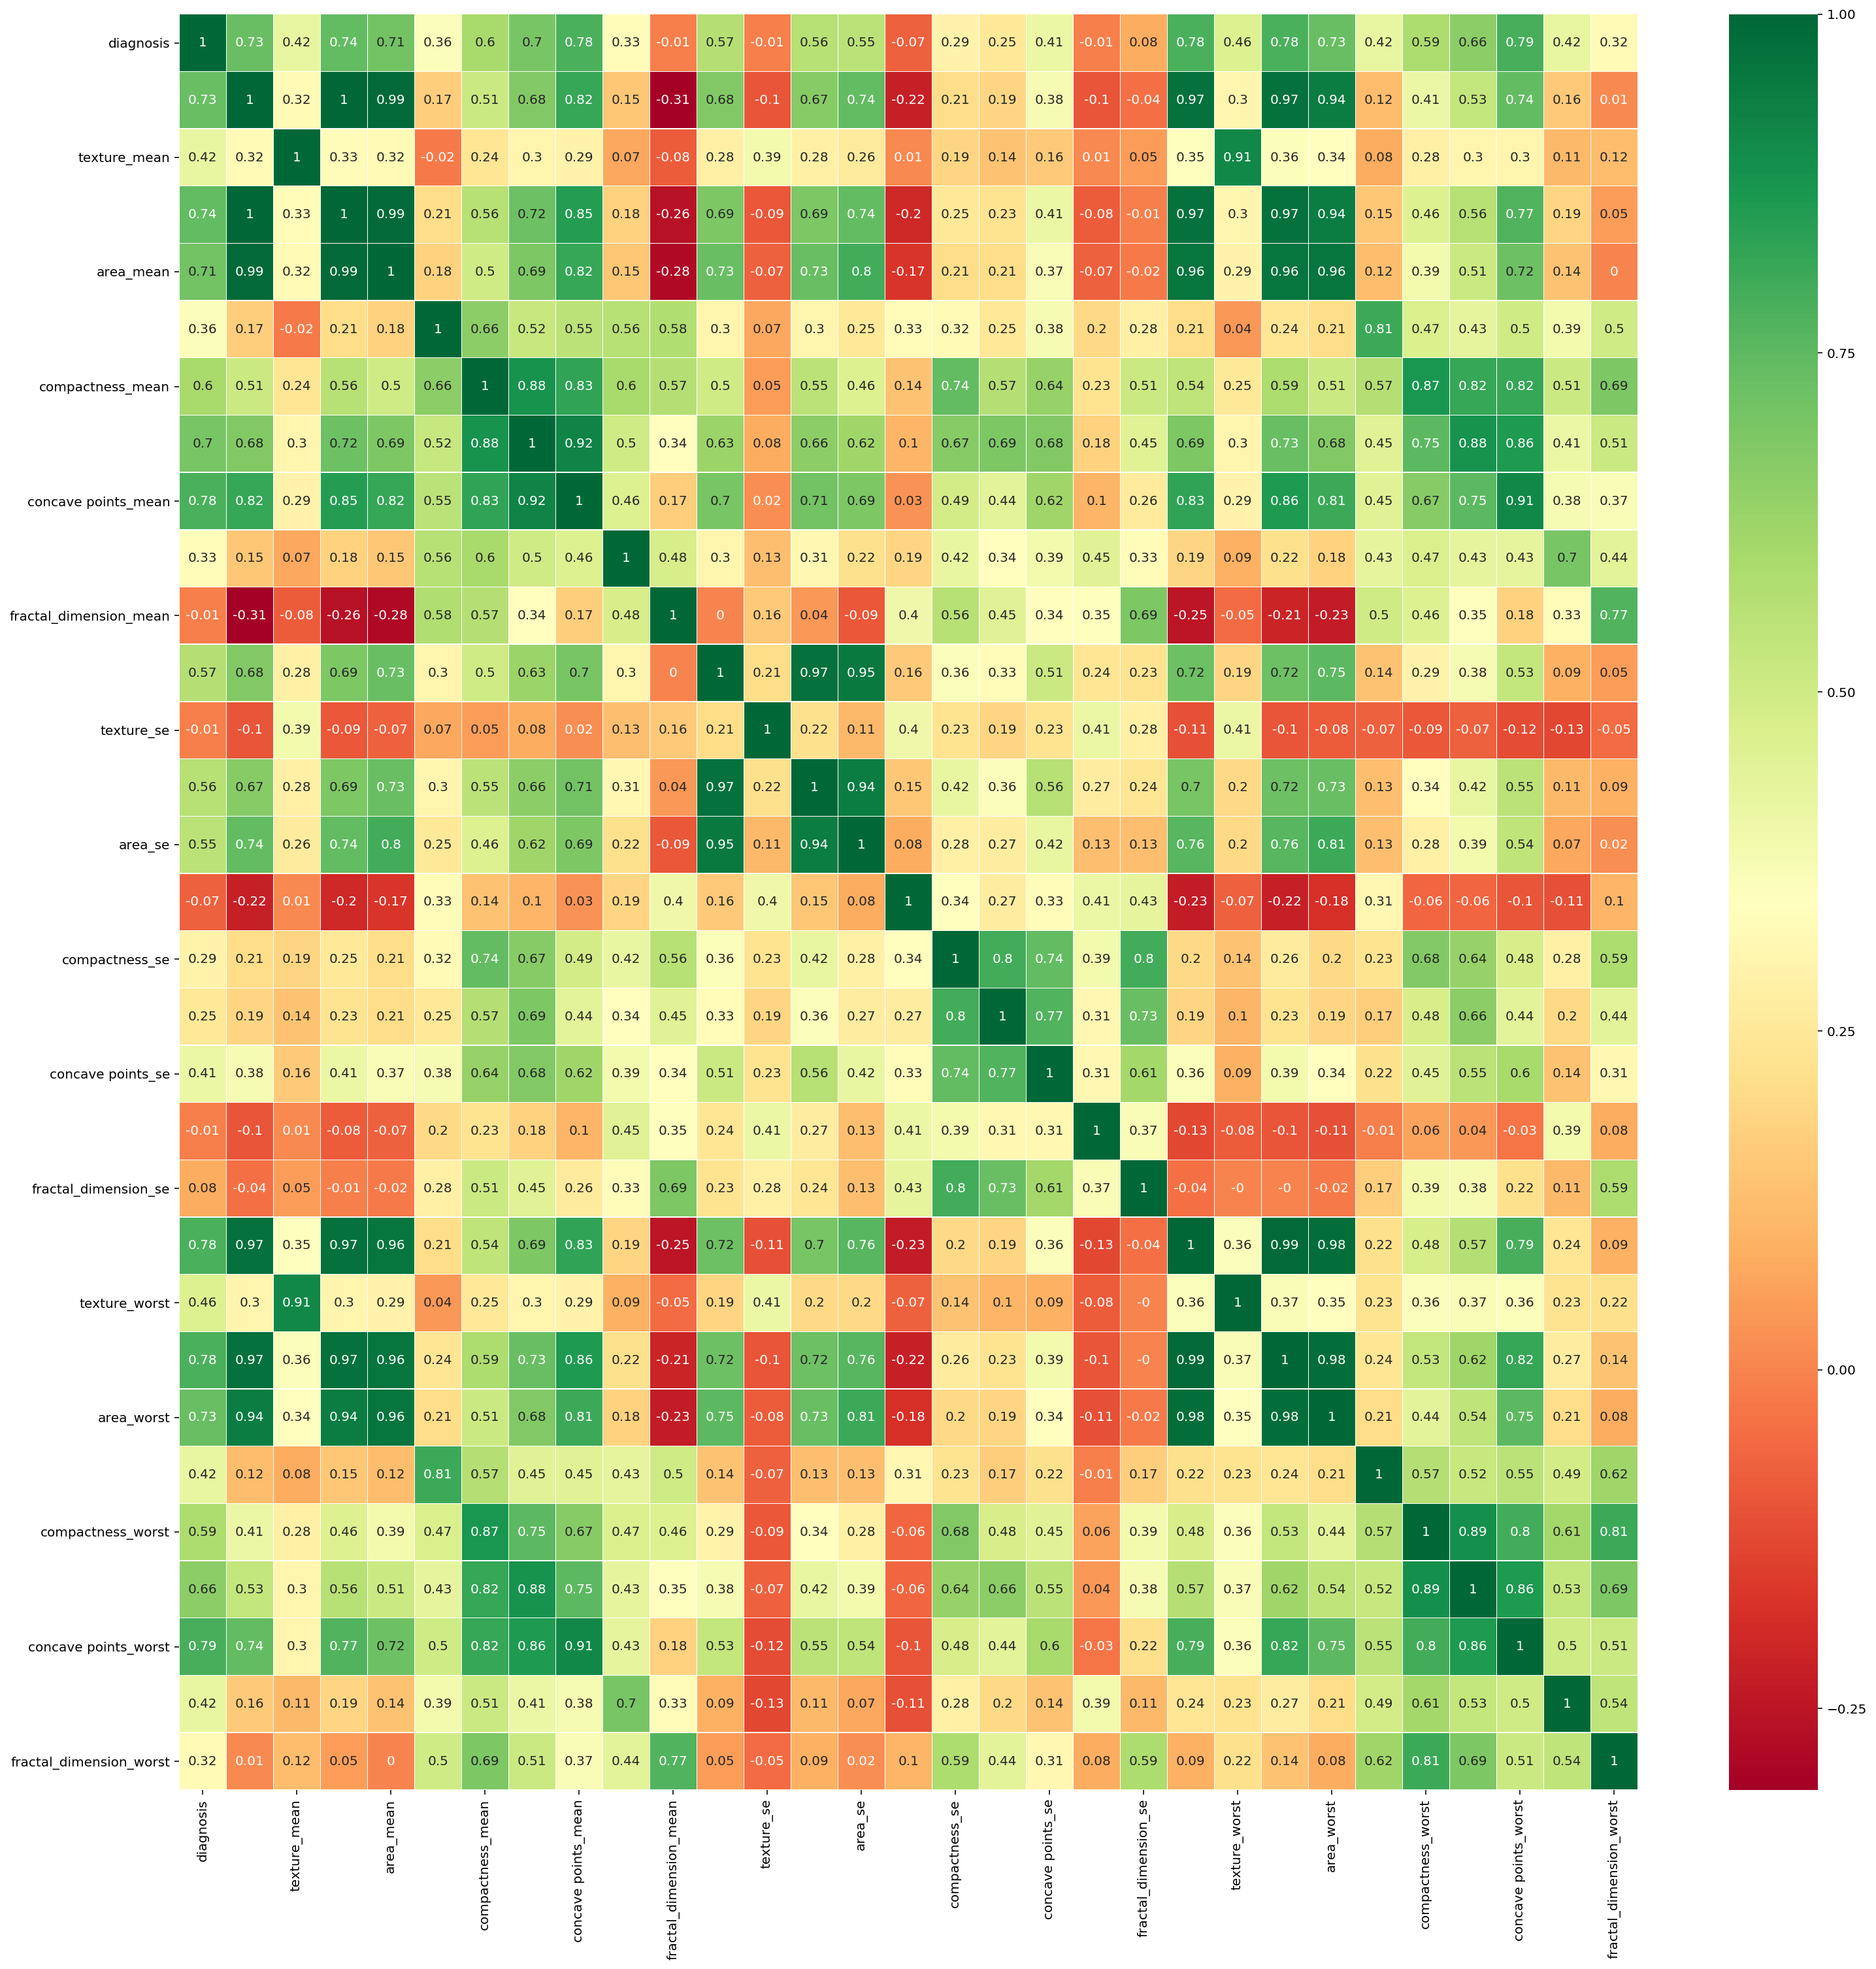

In [24]:
%config InlineBackend.figure_format = 'retina'
correlation_matrix = data.corr(method ='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)

fig=plt.gcf()
fig.set_size_inches(25,25)
plt.show()

In [25]:
corr_df_p = data.corr(method='spearman')
corr_df_p

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.732785      0.461971        0.748496   
radius_mean               0.732785     1.000000      0.340956        0.997802   
texture_mean              0.461971     0.340956      1.000000        0.348142   
perimeter_mean            0.748496     0.997802      0.348142        1.000000   
area_mean                 0.734122     0.999602      0.344145        0.997068   
smoothness_mean           0.371892     0.148510      0.024649        0.182923   
compactness_mean          0.609288     0.497578      0.266499        0.543925   
concavity_mean            0.733308     0.645728      0.342646        0.681958   
concave points_mean       0.777877     0.759702      0.306891        0.788629   
symmetry_mean             0.332567     0.120242      0.110130        0.150049   
fractal_dimension_mean   -0.025903    -0.349931     -0.059303       -0.304891   
radius_se                 0.616912     0.550247      0.363621        0.560326   
texture_se                0.019419    -0.144499      0.450720       -0.137578   
perimeter_se              0.630411     0.565520      0.386813        0.582789   
area_se                   0.714184     0.738077      0.395139        0.745824   
smoothness_se            -0.052193    -0.326385      0.037048       -0.311147   
compactness_se            0.380666     0.264904      0.263591        0.308620   
concavity_se              0.470338     0.364555      0.287188        0.402277   
concave points_se         0.488717     0.410576      0.238610        0.441996   
symmetry_se              -0.092303    -0.241376      0.008945       -0.228187   
fractal_dimension_se      0.201492    -0.008411      0.147605        0.032429   
radius_worst              0.787933     0.978604      0.366547        0.981244   
texture_worst             0.476720     0.314911      0.909218        0.323109   
perimeter_worst           0.796319     0.971555      0.375273        0.978980   
area_worst                0.786902     0.978863      0.368335        0.980864   
smoothness_worst          0.425513     0.125789      0.101401        0.156611   
compactness_worst         0.606810     0.491357      0.290917        0.534565   
concavity_worst           0.705734     0.596043      0.339725        0.632106   
concave points_worst      0.781674     0.727265      0.319235        0.757526   
symmetry_worst            0.396843     0.174698      0.120693        0.199007   
fractal_dimension_worst   0.311477     0.044564      0.116144        0.088961   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.734122         0.371892          0.609288   
radius_mean               0.999602         0.148510          0.497578   
texture_mean              0.344145         0.024649          0.266499   
perimeter_mean            0.997068         0.182923          0.543925   
area_mean                 1.000000         0.138053          0.488988   
smoothness_mean           0.138053         1.000000          0.678806   
compactness_mean          0.488988         0.678806          1.000000   
concavity_mean            0.642557         0.518511          0.896518   
concave points_mean       0.755165         0.565172          0.848295   
symmetry_mean             0.113928         0.542228          0.552203   
fractal_dimension_mean   -0.358425         0.588465          0.499195   
radius_se                 0.553388         0.334282          0.506582   
texture_se               -0.142469         0.091283          0.047766   
perimeter_se              0.568237         0.331360          0.583520   
area_se                   0.741518         0.296059          0.539511   
smoothness_se            -0.327431         0.338692          0.127381   
compactness_se            0.260362         0.392455          0.817875   
concavity_se              0.362308         0.354730          0.772283   
concave points_se         0.406468         0.

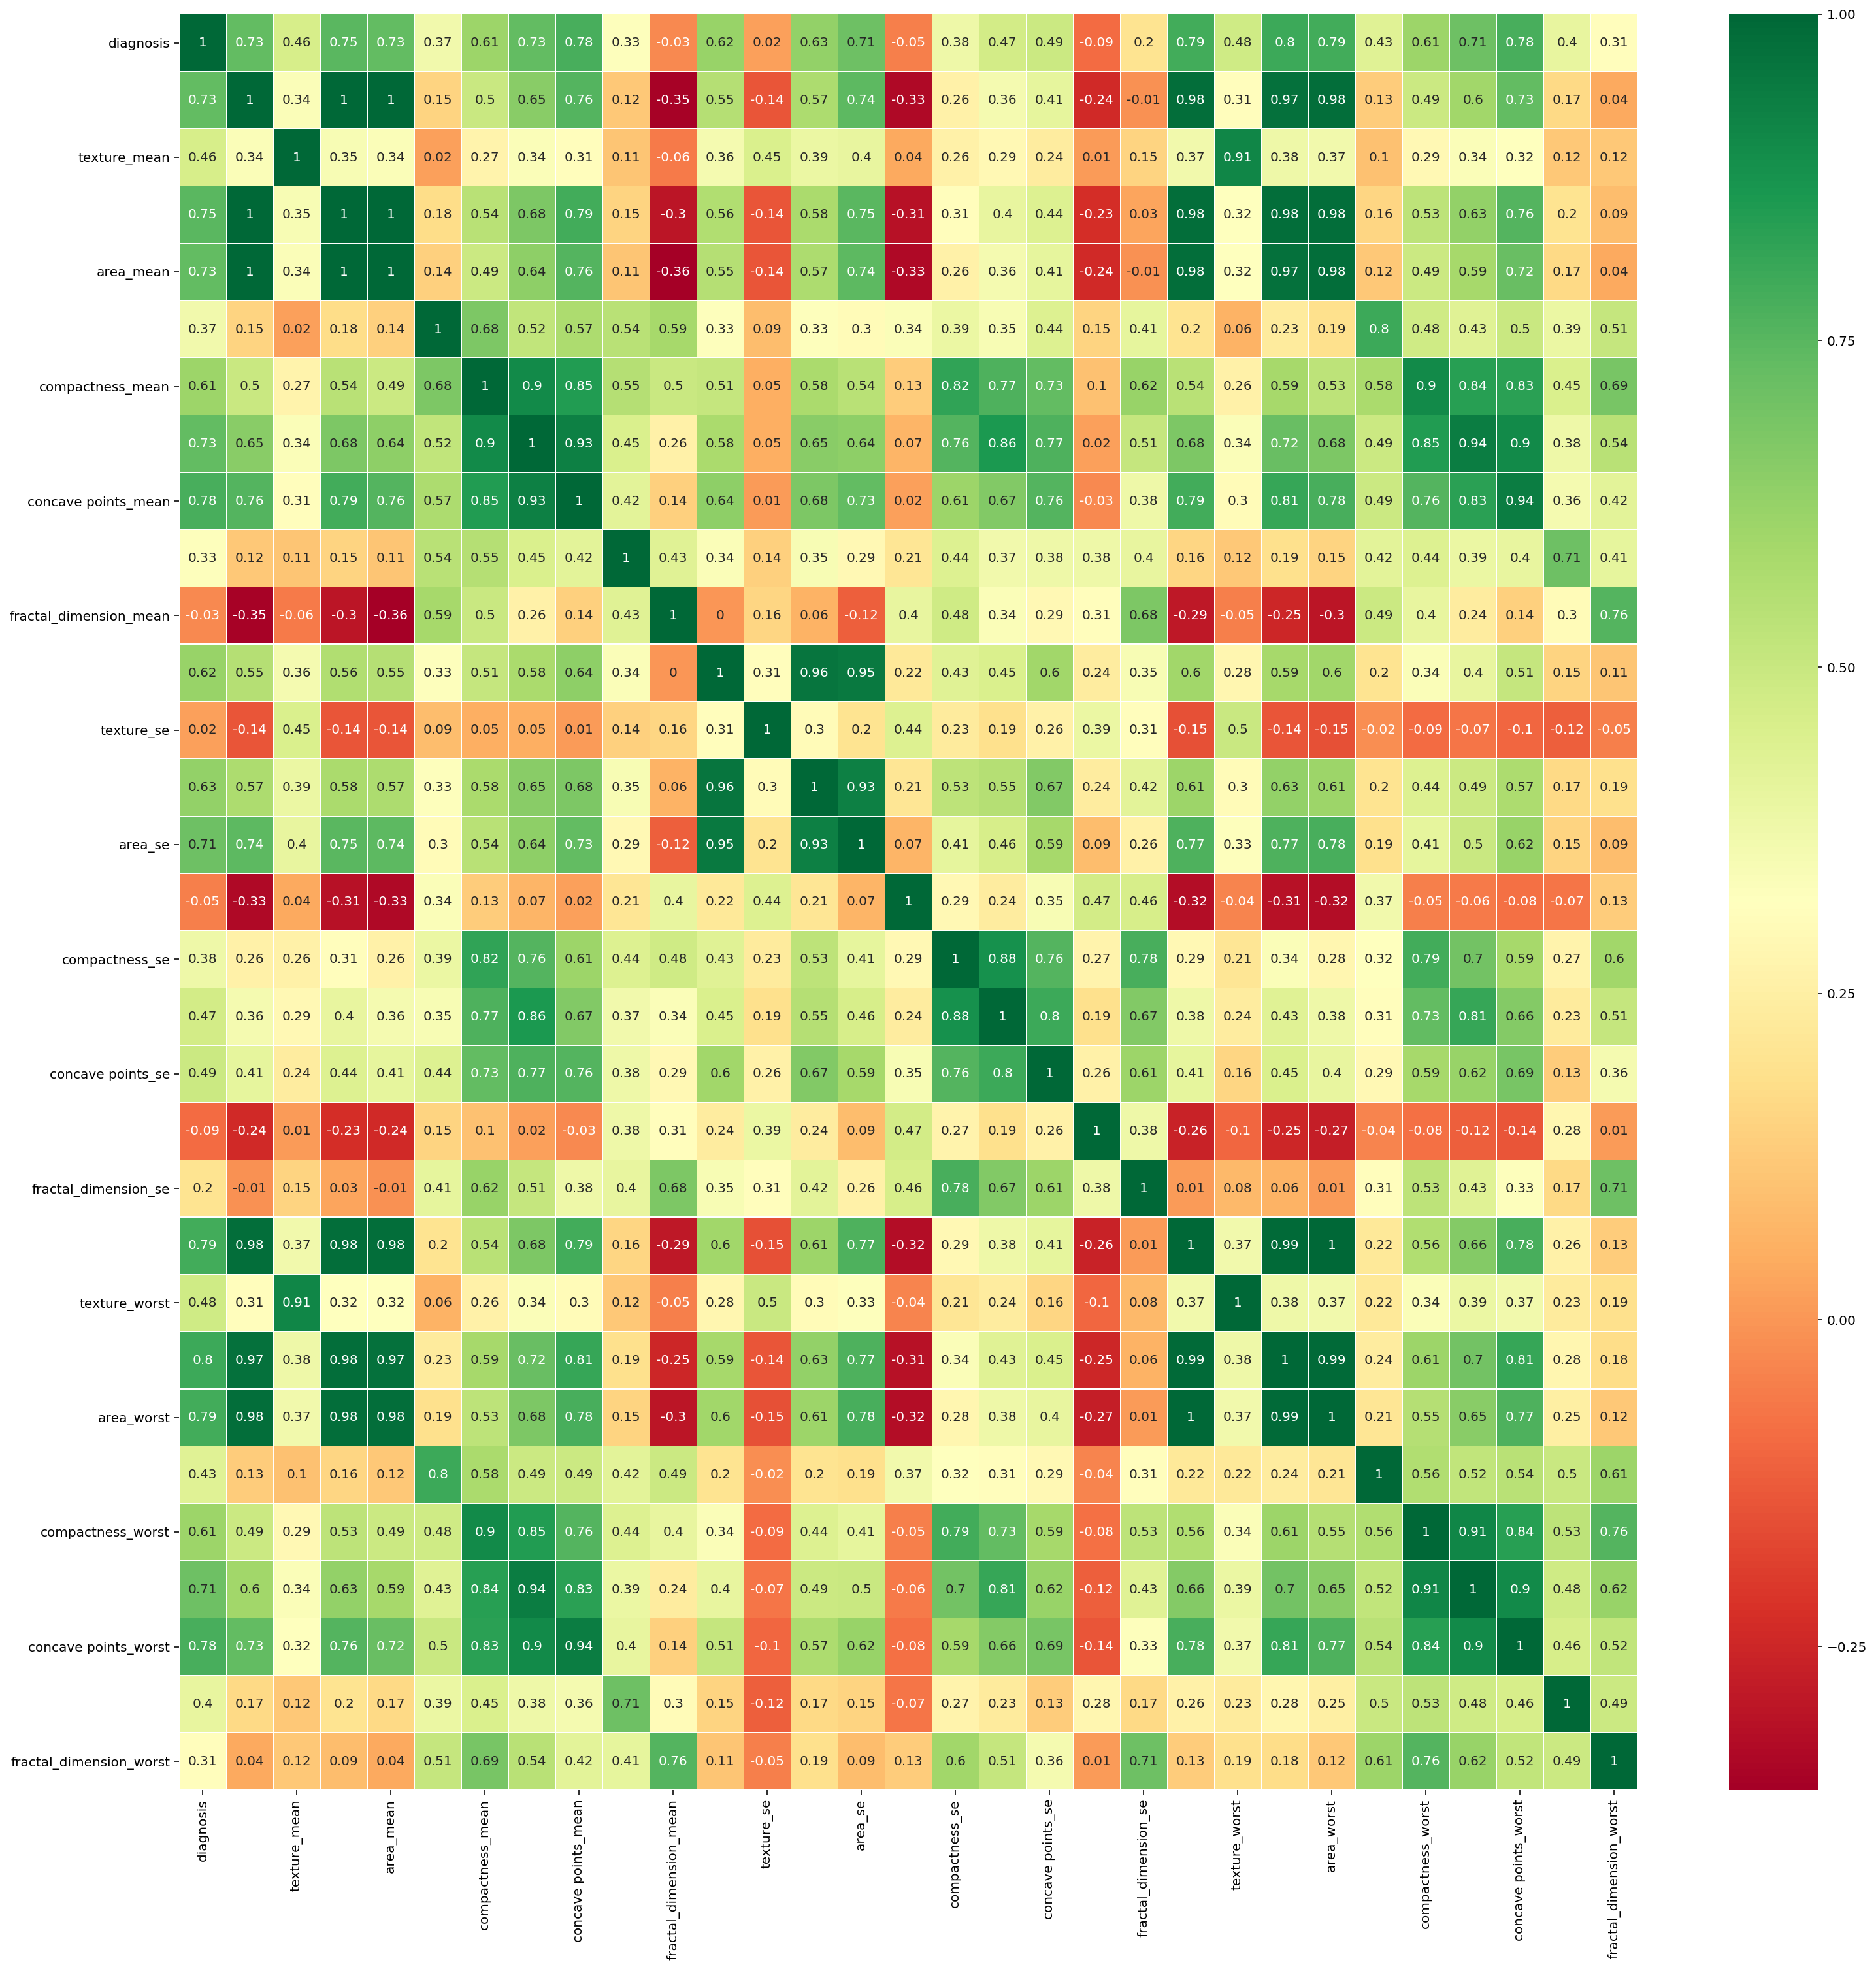

In [26]:
%config InlineBackend.figure_format = 'retina'
correlation_matrix = data.corr(method ='spearman').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)

fig=plt.gcf()
fig.set_size_inches(25,25)
plt.show()

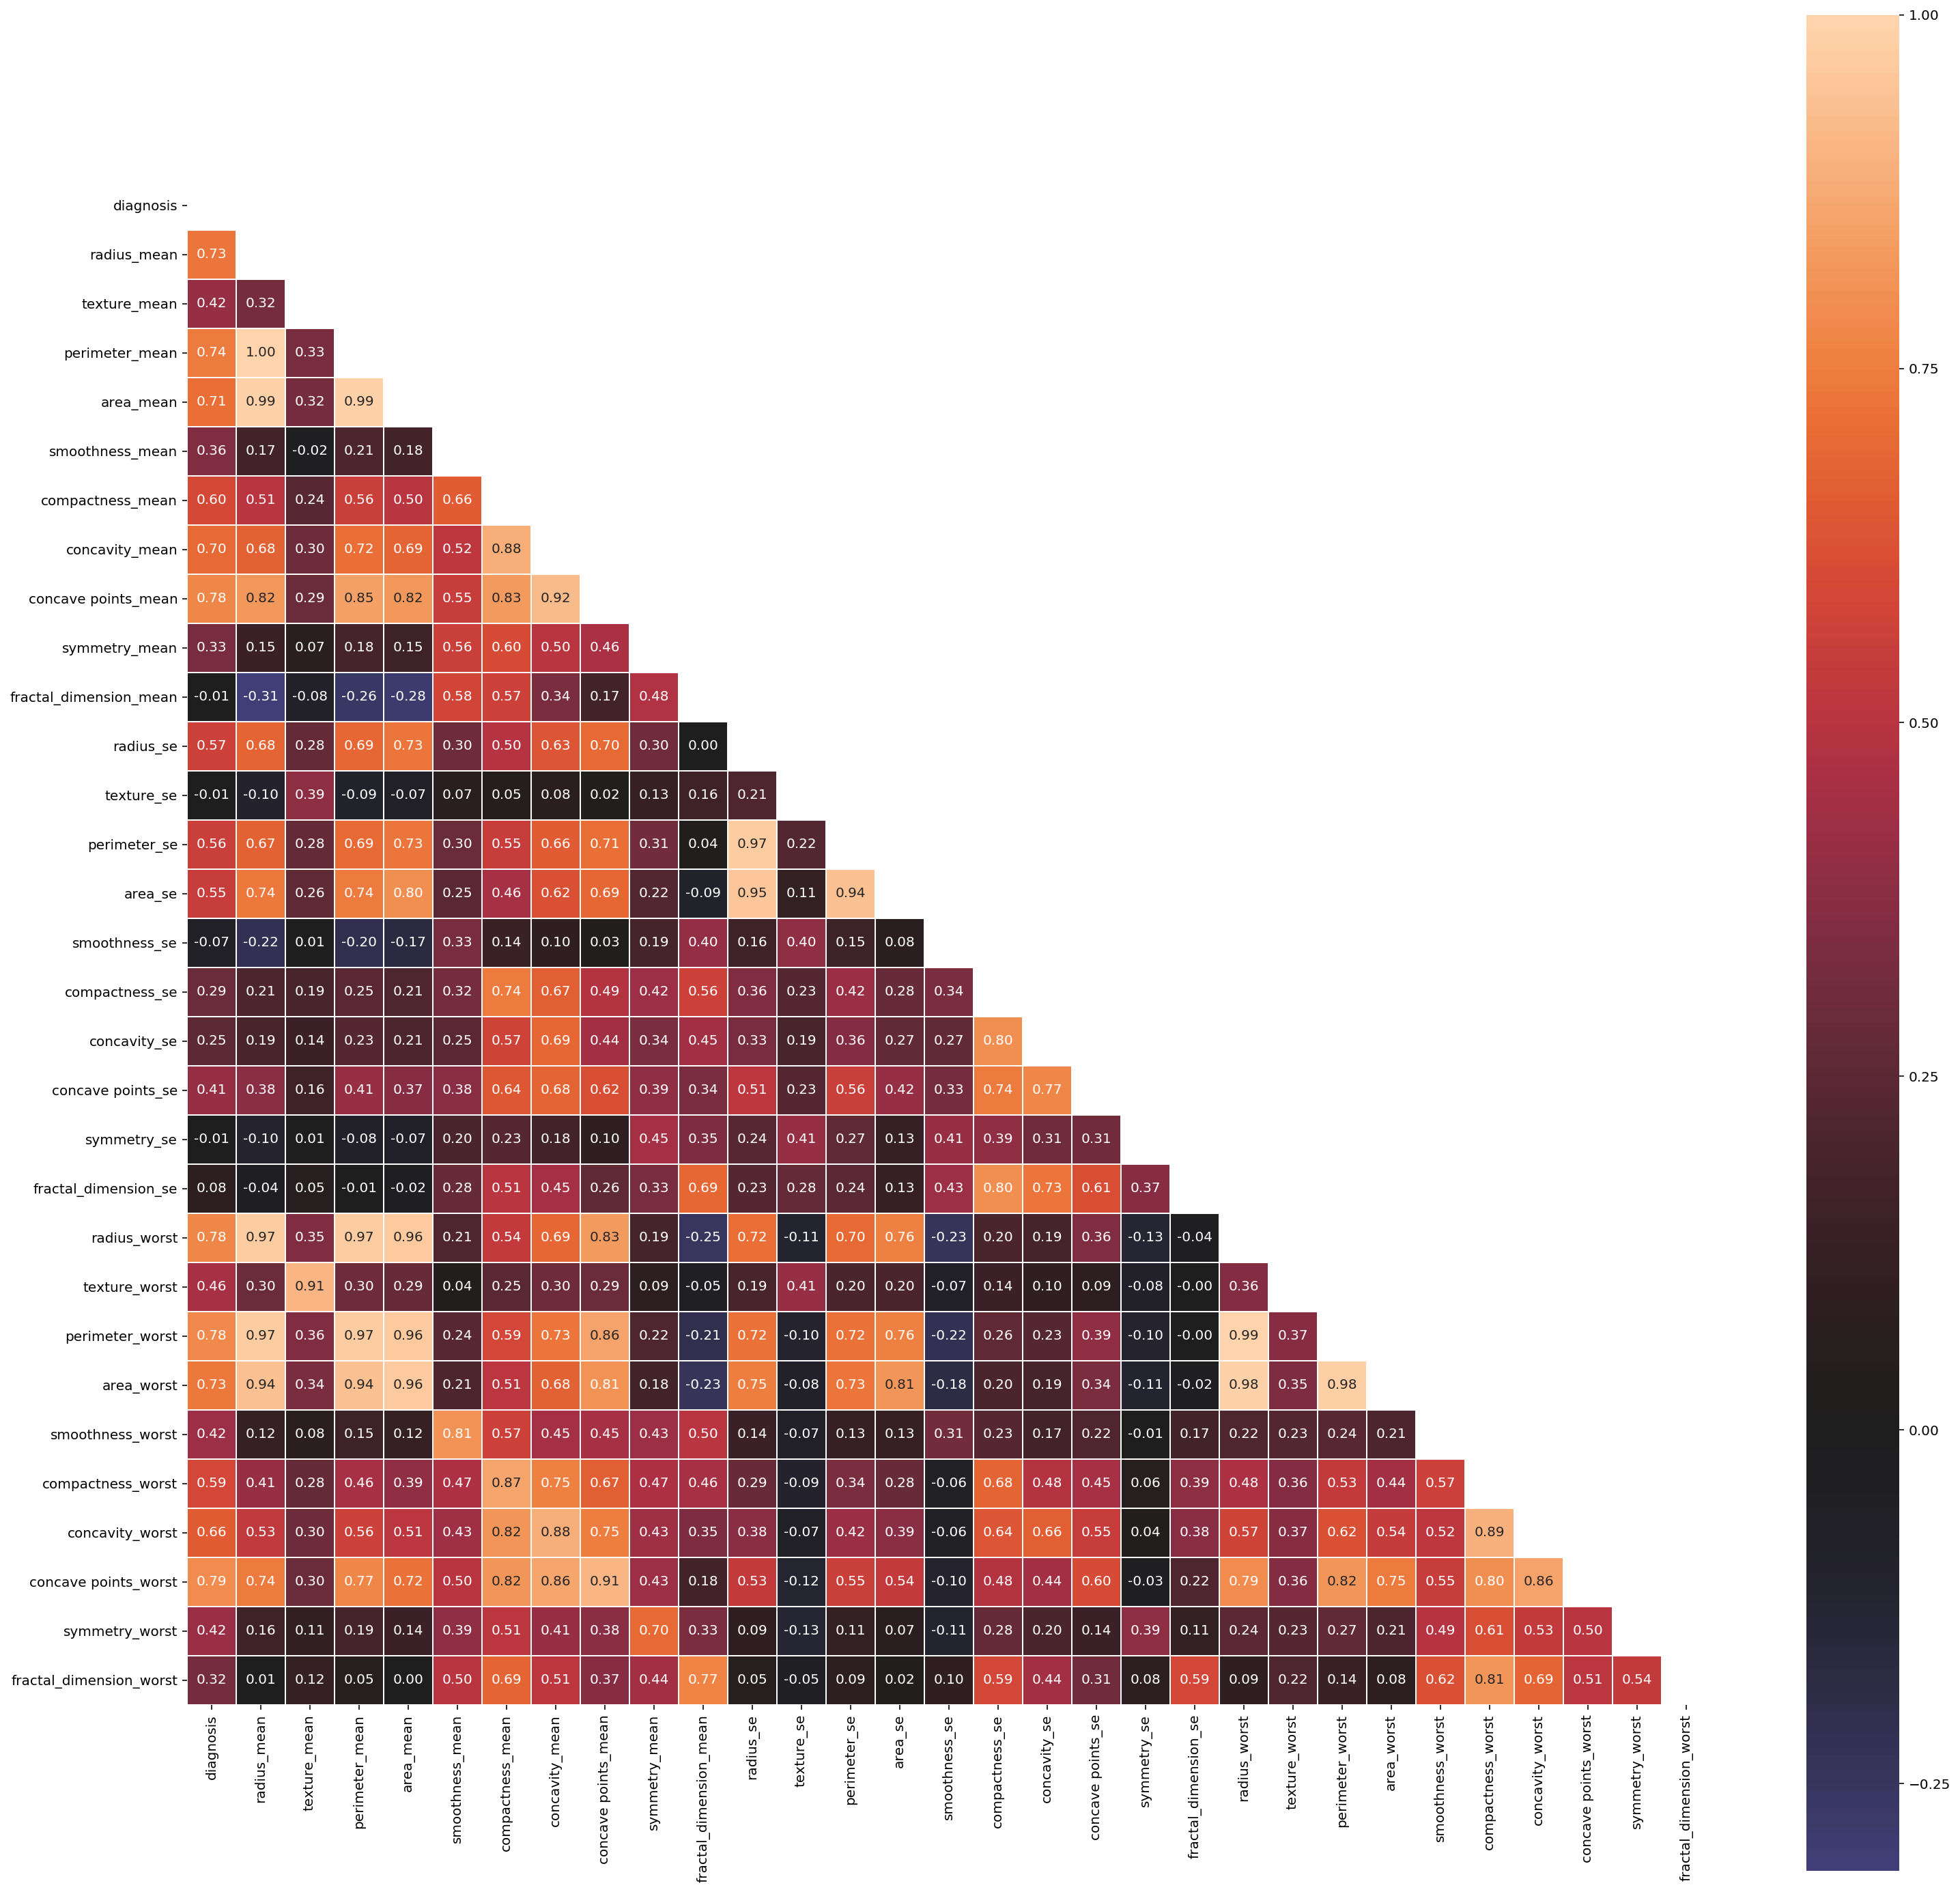

In [30]:
%config InlineBackend.figure_format = 'retina'

corr = data.corr(method='pearson')
plt.figure(figsize=(25,25))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f', square=True, linewidths=.5)
plt.show()

**По полученной информации корреляционных матриц можно сделать вывод:**
- видна сильная положительная корреляция между переменными
    - наиболее явная корреляция прослеживается у переменных: 
        - 'radius_mean' с 'area_mean' 0,99
        - 'perimeter_mean' с 'area_mean' 0,99
        - 'concavity_mean' с 'concave points_mean' 0,92
        - 'compactness_mean' с 'concavity_mean' 0,88
        - 'perimeter_mean' с 'concave points_mean' 0,85
        - 'compactness_mean' с 'concave points_mean' 0,83
        - 'area_mean' с 'concave points_mean' 0,82
        - 'radius_mean' с 'concave points_mean' 0,82
        - 'perimeter_mean' с 'concavity_mean' 0,72
        - 'diagnosis' с 'concave points_mean' 0,78
        - 'diagnosis' с 'perimeter_mean' 0,74
        - 'diagnosis' с 'radius_mean' 0,73
        - 'diagnosis' с 'area_mean' 0,71
        - 'diagnosis' с 'concavity_mean' 0,70


- большая корреляция может негативно сказаться на качестве модели

**Визуализируем взаимосвязи между переменными, посмотрим какие инсайды они нам дадут, для дальнейших гипотез**

**Посмотрим на соотношение 'Benign' и 'Malignant'**
- 'Benign' - доброкачественная опухоль - 0
- 'Malignant' - злокачественная опухоль - 1

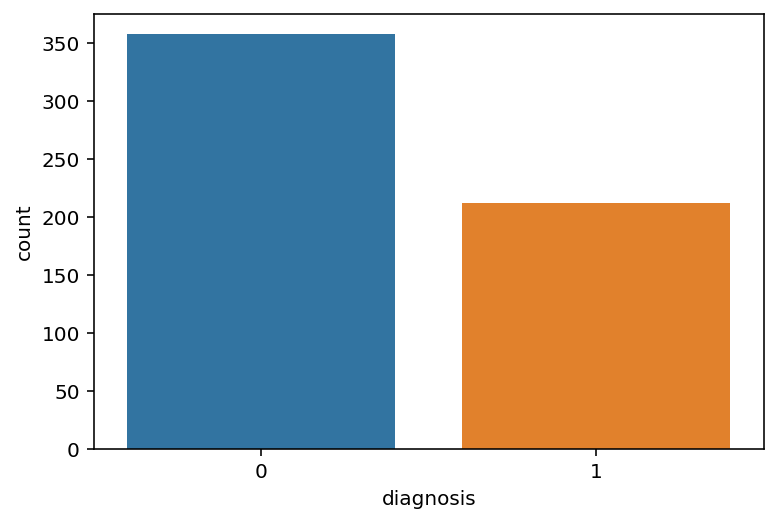

In [33]:
%config InlineBackend.figure_format = 'retina'
sns.countplot(x="diagnosis", data=data)
data.loc[:,'diagnosis'].value_counts()

plt.show()

По распределению нашего target значения, можно сделать вывод что данные сбалансированны достаточно для дальнейшей работы

**Посмотрим на распределение данных в зависимости от поставленного диагноза**

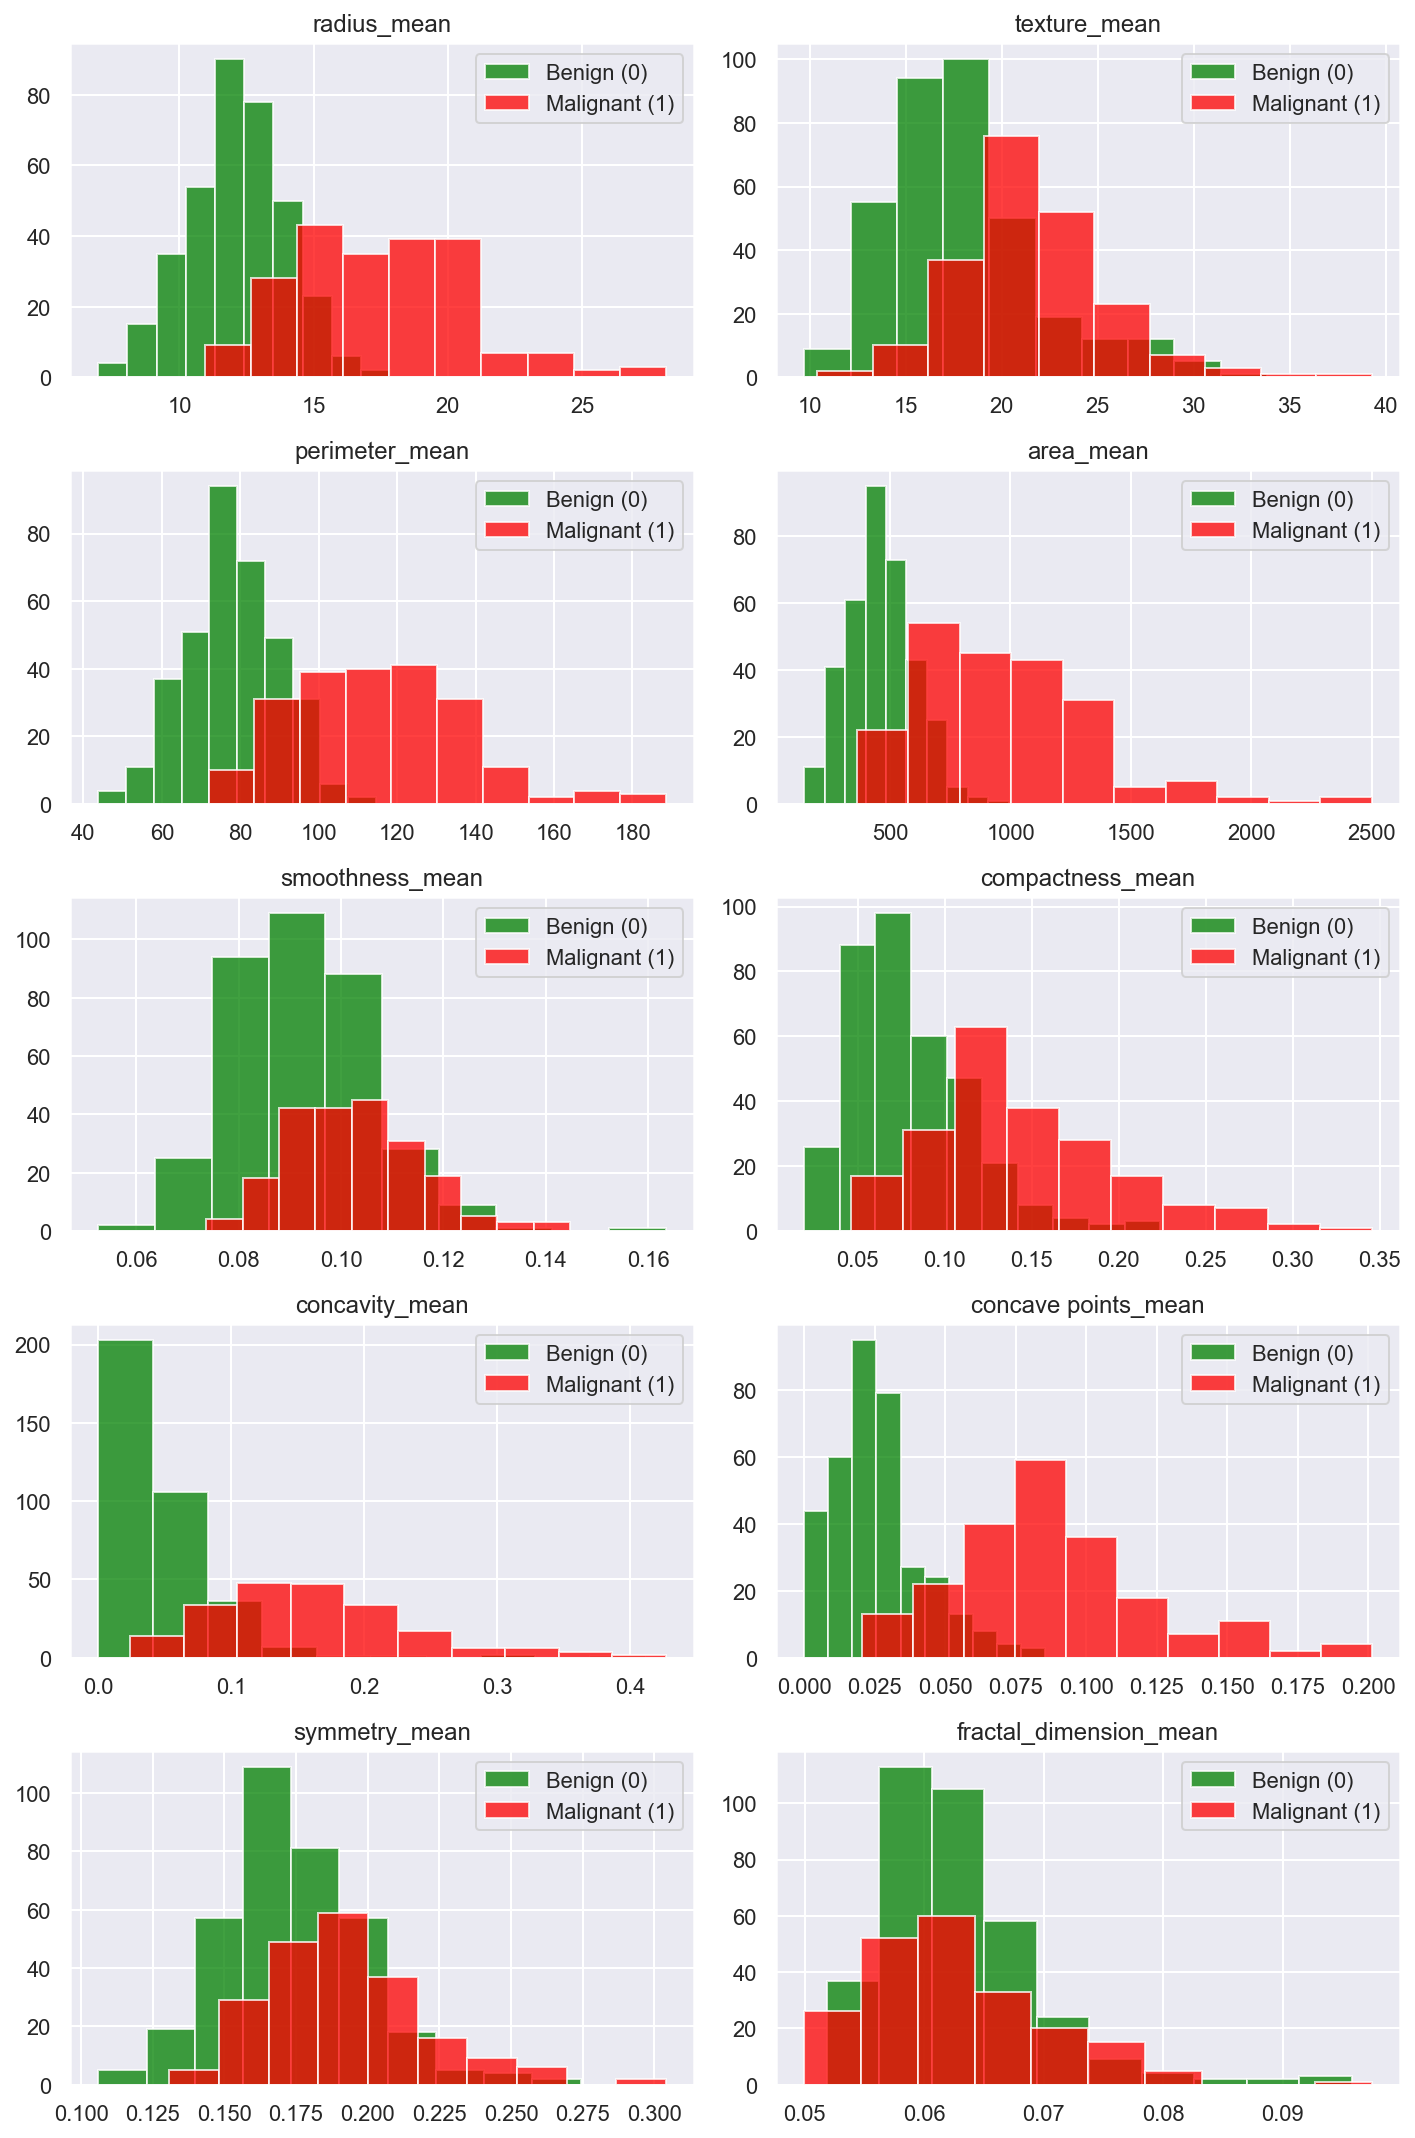

In [36]:
%config InlineBackend.figure_format = 'retina'
fig, ax  =  plt.subplots(5,2, figsize=(10,15))

for col,axis in zip(data.columns[1:],[i for i in ax.flat]):
    data.loc[data['diagnosis']==0,data.columns!='diagnosis'].hist \
    (column=col,ax=axis,alpha=0.75,color='green',label='Benign (0)')
    data.loc[data['diagnosis']==1,data.columns!='diagnosis'].hist \
    (column=col,ax=axis,alpha=0.75,color='red',label='Malignant (1)') 
    axis.legend(loc="upper right")
    
plt.tight_layout()
plt.show()

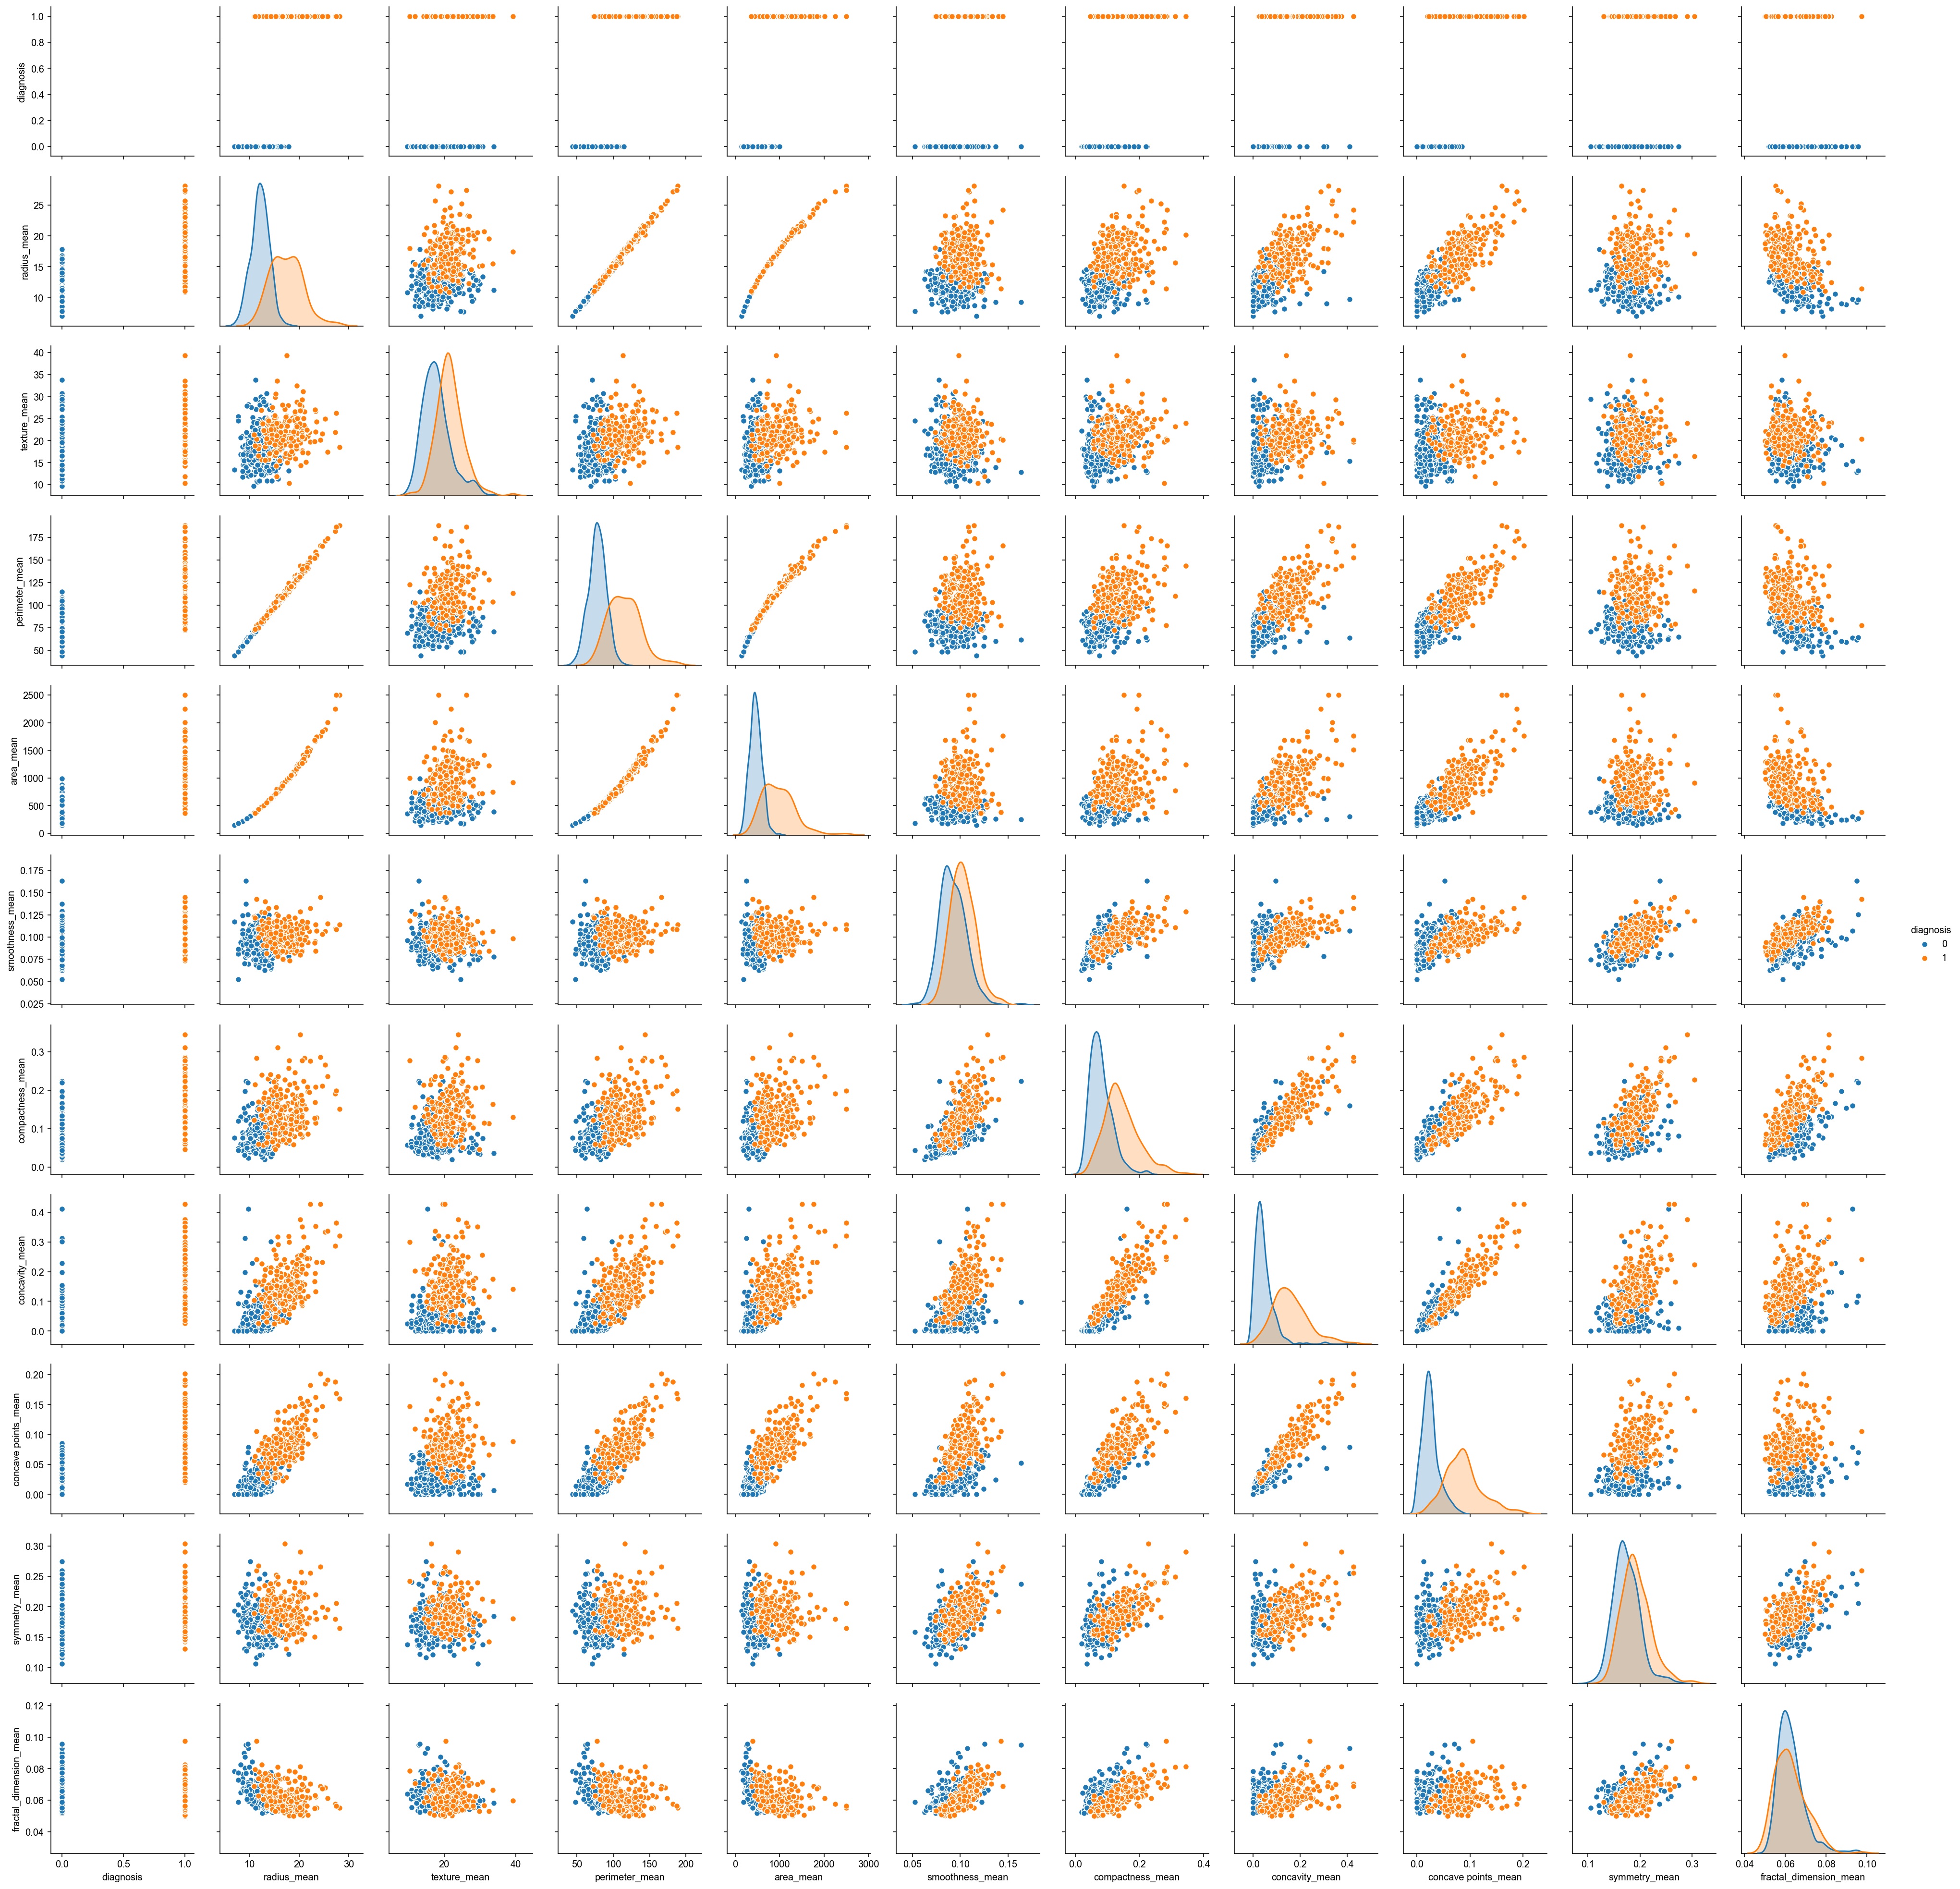

In [35]:
%config InlineBackend.figure_format = 'retina'

sns.pairplot(data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']], hue="diagnosis", diag_kind="kde")

sns.set()
plt.show()

- Распределение и разброс данных сильно различается в зависимости их принадлежности к той или иной группе (доброкачественных или злокачественных опухолей)
- Параметры доброкачественных опухолей имеют меньший разброс относительно среднего, для злокачественных разброс выше

**Сформируем несколько Гипотез**

**Гипотеза 1**
- Нулевая гипотеза: средний радиус доброкачественных и злокачественных клеток одинаковый
- Альтернативная гипотеза: средний радиус доброкачественных и злокачественных клеток разный

In [38]:
benign = data[data['diagnosis'] == 0]['radius_mean']
malignant = data[data['diagnosis'] == 1]['radius_mean']

stats.ttest_ind(benign, malignant)

Ttest_indResult(statistic=-25.435821610057054, pvalue=8.465940572262422e-96)

Мы отвергаем Нулевую гипотезу
- Средний радиус доброкачественных и злокачественных клеток разный.

**Гипотеза 2**
- Нулевая гипотеза: доброкачественные клетки в среднем более гладкие, чем злокачественные
- Альтернативная гипотеза: доброкачественные клетки в среднем менее гладкие, чем злокачественные

In [39]:
benign = data[data['diagnosis'] == 0]['smoothness_mean']
malignant = data[data['diagnosis'] == 1]['smoothness_mean']

stats.ttest_ind(benign, malignant)

Ttest_indResult(statistic=-9.146098808149038, pvalue=1.0518503592032013e-18)

Мы принимаем Нулевую гипотезу
- Доброкачественные клетки в среднем более гладкие, чем злокачественные.

**Выбранная стратегия Feature Selection – сокращение размерности**

**Перед построением модели:**
- сократим размерность данных, убрав признаки, которые сильно коррелируют друг с другом
- удаляем признаки, которые имеют очень низкую корреляцию с target переменной
- нормализуем данные
- разделим наш df на X и y

In [41]:
corr_matrix_pearson = data.corr()
columns = np.full((corr_matrix_pearson.shape[0],), True, dtype=bool)

for i in range(corr_matrix_pearson.shape[0]):
    for j in range(i+1, corr_matrix_pearson.shape[0]):
        if corr_matrix_pearson.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False

selected_columns = data.columns[columns]
df = data[selected_columns]

In [47]:
correl_matrix = df.corr()
df1 = df.drop(list(correl_matrix[(correl_matrix.diagnosis<=0.15) & (correl_matrix.diagnosis >= -0.15)].index),
              axis='columns')

In [50]:
display(df1.sample(10))
display(df1.shape)

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
31           1       11.840         18.70          0.11090           0.15160   
539          0        7.691         25.44          0.08668           0.11990   
240          0       13.640         15.60          0.09423           0.06630   
419          0       11.160         21.41          0.10180           0.05978   
529          0       12.070         13.44          0.11000           0.09009   
345          0       10.260         14.71          0.09882           0.09159   
201          1       17.540         19.32          0.08968           0.11980   
290          0       14.410         19.73          0.08757           0.16760   
489          1       16.690         20.20          0.07497           0.07112   
170          0       12.320         12.39          0.10280           0.06981   

     symmetry_mean  radius_se  compactness_se  concave points_se  \
31          0.2301     0.4825        0.034140           0.010440   
539         0.2037     0.2196        0.064570           0.013640   
240         0.1717     0.3242        0.012480           0.011030   
419         0.1615     0.2865        0.009442           0.006159   
529         0.1657     0.2513        0.011530           0.007986   
345         0.1633     0.3380        0.046710           0.012960   
201         0.1506     0.3971        0.025690           0.013450   
290         0.1714     0.8811        0.106400           0.027710   
489         0.1846     0.2473        0.014460           0.005297   
170         0.1959     0.2360        0.011800           0.012410   

     symmetry_worst  
31           0.4761  
539          0.2790  
240          0.2530  
419          0.2976  
529          0.2781  
345          0.2434  
201          0.2928  
290          0.2272  
489          0.4677  
170          0.2827

(569, 10)

In [56]:
col = df1.columns
X = StandardScaler().fit_transform(df1)
X = pd.DataFrame(X, columns=col).astype('float64')

In [58]:
X = X.drop(['diagnosis'], axis=1, inplace=False)
y = df1.diagnosis

**Разделим наш dataset на train и test выборки в соотношении 80/20 с перемешиванием данных**

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(len(X_train))
print(len(X_test))

455
114


**Строим модель Random Forest**

In [99]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred_clf_train = clf.predict_proba(X_train)[:, 1]
y_pred_clf_test = clf.predict_proba(X_test)[:, 1]

roc_auc_train = np.round(roc_auc_score(y_train, y_pred_clf_train), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_pred_clf_test), 2)

print('train:', roc_auc_train)
print('test:', roc_auc_test)

train: 1.0
test: 0.97


**Наиболее значимые переменные в нашей модели**

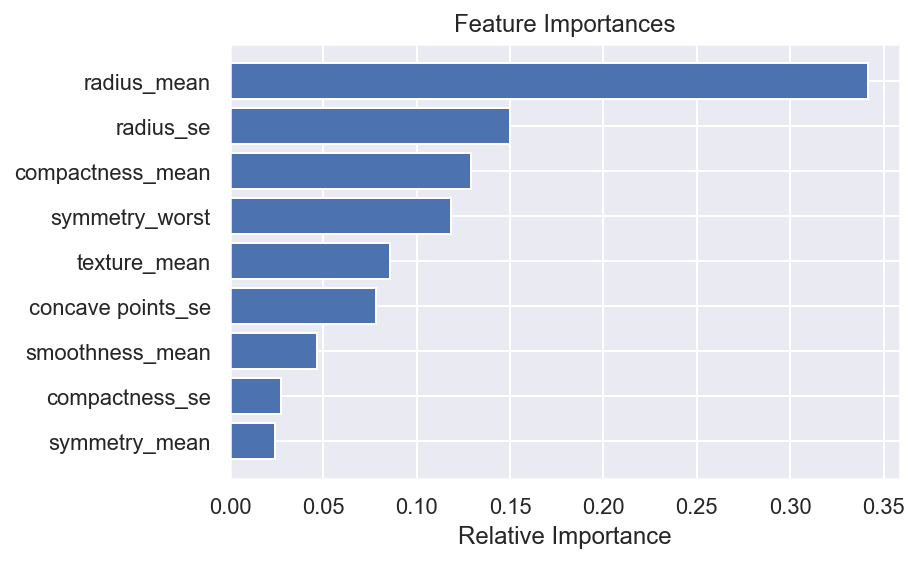

In [86]:
features = X_train.columns
importances = clf.feature_importances_

indices = np.argsort(importances)[:30]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Проверим качество классификации**

In [98]:
accuracy_score_log = accuracy_score(y_test, y_pred_clf_test.round())
f1_score_log = f1_score(y_test, y_pred_clf_test.round())
precision_score_log = precision_score(y_test, y_pred_clf_test.round())
recall_score_log = recall_score(y_test, y_pred_clf_test.round())

print('accuracy_score:', accuracy_score_log)
print('f1_score:', f1_score_log)
print('precision_score:', precision_score_log)
print('recall_score:', recall_score_log)

accuracy_score: 0.9298245614035088
f1_score: 0.9069767441860465
precision_score: 0.9069767441860465
recall_score: 0.9069767441860465


In [97]:
y_pred1 = clf.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



**Построим модель SVC метод опорных векторов**

In [90]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

y_pred_svc_train = svc.predict_proba(X_train)[:, 1]
y_pred_svc_test = svc.predict_proba(X_test)[:, 1]

roc_auc_train = np.round(roc_auc_score(y_train, y_pred_svc_train), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_pred_svc_test), 2)

print('train:', roc_auc_train)
print('test:', roc_auc_test)

train: 0.99
test: 0.98


**Проверим качество классификации**

In [91]:
accuracy_score_log = accuracy_score(y_test, y_pred_svc_test.round())
f1_score_log = f1_score(y_test, y_pred_svc_test.round())
precision_score_log = precision_score(y_test, y_pred_svc_test.round())
recall_score_log = recall_score(y_test, y_pred_svc_test.round())

print('accuracy_score:', accuracy_score_log)
print('f1_score:', f1_score_log)
print('precision_score:', precision_score_log)
print('recall_score:', recall_score_log)

accuracy_score: 0.9473684210526315
f1_score: 0.9302325581395349
precision_score: 0.9302325581395349
recall_score: 0.9302325581395349


In [100]:
y_pred2 = svc.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



**Модель SVC метод опорных векторов, дала наиболее высокий балл в сравнении с моделью Random Forest**

In [ ]:
pass